# Classification metrics and Naive Bayes

We build an analytics model using text as our data, specifically trying to understand the sentiment of tweets about the company Apple. This is  a special classification problem, often called Sentiment Analysis.

The challenge is to see if we can correctly classify tweets as being negative, positive, or neutral about Apple.

## Get the data

In [21]:
import pandas as pd  # Start by importing the tweets data

In [22]:
X = pd.read_csv('../datasets/tweets.csv') 

In [23]:
X.shape

(1181, 2)

In [24]:
X.columns

Index(['Tweet', 'Avg'], dtype='object')

In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1181 entries, 0 to 1180
Data columns (total 2 columns):
Tweet    1181 non-null object
Avg      1181 non-null float64
dtypes: float64(1), object(1)
memory usage: 18.5+ KB


In [26]:
X.head(5)

,Tweet,Avg
0,"I have to say, Apple has by far the best custo...",2.0
1,iOS 7 is so fricking smooth & beautiful!! #Tha...,2.0
2,LOVE U @APPLE,1.8
3,"Thank you @apple, loving my new iPhone 5S!!!!!...",1.8
4,.@apple has the best customer service. In and ...,1.8


It contains 1181 tweets (as text) and one manually labeled sentiment.

In [27]:
min(X.Avg)

-2.0

In [28]:
max(X.Avg)

2.0

2 means very positive, 0 is neutral and -2 is very negative

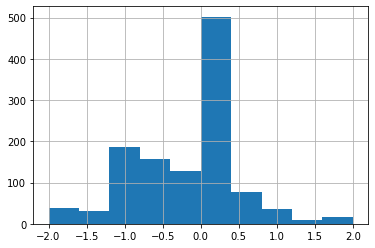

In [29]:
X.Avg.hist();

## Process the data 

First of all, we clean the tweets, by lowering all the letters, removing punctuations and stop words and finally by tokenising and stemming it.

In [30]:
corpusTweets = X.Tweet.tolist() # get a list of all tweets, then is easier to apply preprocessign to each item

In [31]:
# Convert to lower-case
corpusLowered = [s.lower() for s in corpusTweets]

In [32]:
corpusLowered[0:5]

['i have to say, apple has by far the best customer care service i have ever received! @apple @appstore',
 'ios 7 is so fricking smooth & beautiful!! #thanxapple @apple',
 'love u @apple',
 'thank you @apple, loving my new iphone 5s!!!!!  #apple #iphone5s pic.twitter.com/xmhjcu4pcb',
 '.@apple has the best customer service. in and out with a new phone in under 10min!']

In [33]:
# Remove punctuation

import re
corpusNoPunct = [re.sub(r'([^\s\w_]|_)+', ' ', s.strip()) for s in corpusLowered]

In [34]:
corpusNoPunct[0:5]

['i have to say  apple has by far the best customer care service i have ever received   apple  appstore',
 'ios 7 is so fricking smooth   beautiful   thanxapple  apple',
 'love u  apple',
 'thank you  apple  loving my new iphone 5s    apple  iphone5s pic twitter com xmhjcu4pcb',
 ' apple has the best customer service  in and out with a new phone in under 10min ']

Now we remove the stopwords. First we define which are the common words (stopwords) to be removed:

In [35]:
import os
def readStopwords():
    '''
    returns stopwords as strings
    
    Assume that a file called "stopwords.txt"
    exists in the folder
    '''    
    filename = "stopwords.txt"
    path = os.path.join("", filename)
    file = open(path, 'r')
    return file.read().splitlines()  # splitlines is used to remove newlines


In [36]:
stopWords = set(readStopwords())

In [37]:
"the" in stopWords  # quick test

True

In [38]:
stopWords.add("apple")
stopWords.add("appl")
stopWords.add("iphone")
stopWords.add("ipad")
stopWords.add("ipod")
stopWords.add("itunes")
stopWords.add("ios")
stopWords.add("http")

print ("apple" in stopWords)
print ("google" in stopWords)

True
False


To remove a word from the corpus if that word is contained in our stopwords set, we need first to tokenise the corpus (i.e., split it into words or tokens):

In [39]:
# tokenise
corpusTokens = [s.split() for s in corpusNoPunct]

In [40]:
corpusTokens[0:3]

[['i',
  'have',
  'to',
  'say',
  'apple',
  'has',
  'by',
  'far',
  'the',
  'best',
  'customer',
  'care',
  'service',
  'i',
  'have',
  'ever',
  'received',
  'apple',
  'appstore'],
 ['ios',
  '7',
  'is',
  'so',
  'fricking',
  'smooth',
  'beautiful',
  'thanxapple',
  'apple'],
 ['love', 'u', 'apple']]

In [41]:
# Stem document 
from nltk import PorterStemmer
porter = PorterStemmer()

In [42]:
corpus = []
for tweet in corpusTokens:
    cleanTokens = [token for token in tweet if token not in stopWords] # a list of tokens
    stemmedTokens = [porter.stem(token) for token in cleanTokens]
    cleanTweet = ' '.join(stemmedTokens)

    corpus.append(cleanTweet)

In [43]:
corpus[0:5]

['say far best custom care servic ever receiv appstor',
 '7 frick smooth beauti thanxappl',
 'love u',
 'thank love new 5s iphone5 pic twitter com xmhjcu4pcb',
 'best custom servic new phone 10min']

## Create a Document-Term matrix

In text mining, it is important to create the document-term matrix (DTM) of the corpus we are interested in. A DTM is basically a matrix, with documents designated by rows and words by columns, that the elements are the counts or the weights (usually by tf-idf). 

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

In [45]:
cv = CountVectorizer(lowercase=False, max_features=500)
cv.fit(corpus)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=False, max_df=1.0, max_features=500, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [46]:
'apple' in cv.vocabulary_  # a quick test

False

In [47]:
cv.get_feature_names()[0:20] # in alphabetical order

['09',
 '10',
 '18xc8dk',
 '1za',
 '2013',
 '244tsuyoponzu',
 '4sq',
 '5c',
 '5s',
 '64',
 '7evenstarz',
 'absolut',
 'access',
 'account',
 'act',
 'actual',
 'ad',
 'adambain',
 'add',
 'again']

Now we use the voctoriser to transform the corpus into a sparse matrix where each tweet has 1 if the feature is present in it or 0 if not.

In [48]:
bagOfWords = cv.transform(corpus)

In [49]:
bagOfWords

<1181x500 sparse matrix of type '<class 'numpy.int64'>'
	with 5823 stored elements in Compressed Sparse Row format>

In [50]:
sum_words = bagOfWords.toarray().sum(axis=0)

In [51]:
words_freq = [(word, sum_words[idx]) for word, idx in cv.vocabulary_.items()]

In [52]:
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

In [53]:
words_freq[:10]

[('new', 113),
 ('ly', 112),
 ('com', 109),
 ('twitter', 108),
 ('ipodplayerpromo', 102),
 ('5s', 97),
 ('phone', 91),
 ('pic', 84),
 ('get', 75),
 ('5c', 63)]

We put it into a data frame to use it in the classifier

In [54]:
df = pd.DataFrame(bagOfWords.toarray())

In [55]:
df.shape

(1181, 500)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1181 entries, 0 to 1180
Columns: 500 entries, 0 to 499
dtypes: int64(500)
memory usage: 4.5 MB


In [57]:
df.head(1)

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We start by splitting the tweets into training and test sets, as usual

In [58]:
import numpy.random
numpy.random.seed(100)  # just for reproducibility

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X.Avg = [int(round(a)) for a in X.Avg] # cluster target into 5 classes

In [61]:
X_train, X_test, y_train, y_test = train_test_split(df, X.Avg, test_size=0.25)

In [62]:
X_test.shape

(296, 500)

## Train and test the classifier

Now we train the Naive Bayes classifier

In [63]:
from sklearn.naive_bayes import MultinomialNB

In [64]:
classifier = MultinomialNB()

In [65]:
classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [66]:
predictions = classifier.predict(X_test)

In [67]:
predictions[0:100]

array([ 0,  0,  1,  0, -1,  0,  0, -1,  0,  0,  0,  1,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0, -1, -1, -1,  0,
        0, -1, -1,  0,  0,  0,  0, -1,  1,  1,  0,  0,  0, -1, -1,  1,  0,
        0,  1, -1,  0,  0, -1, -1,  0,  0, -1, -1,  0,  0,  0, -1, -1,  0,
       -2,  1,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0, -1,  1,
        0,  1,  0,  1,  0,  0,  0, -1,  1,  0,  0, -1, -1,  0, -1])

## Metrics: accuracy and confusion matrix
We can check the quality of the predictions by using the scikit-learn metric, specifically the accuracy (we will see in a moment what i means):

In [68]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy: {:.2}".format(metrics.accuracy_score(y_test, predictions)))

Accuracy: 0.64


The classifier was correct 64% of times (not only if a tweet was negative but also if it was strongly negative or moderately negative).  
A very useful metric is the confusion matrix that displays the predictions and the actual values in a matrix:

In [69]:
mat = metrics.confusion_matrix(y_test, predictions)

In [70]:
mat

array([[  4,   5,   3,   0,   0],
       [  2,  42,  28,   5,   1],
       [  1,  26, 128,   9,   2],
       [  0,   8,  16,  14,   0],
       [  0,   1,   1,   0,   0]])

It's more clear if we visualise it as a heat map:

In [71]:
import matplotlib.pyplot as plt

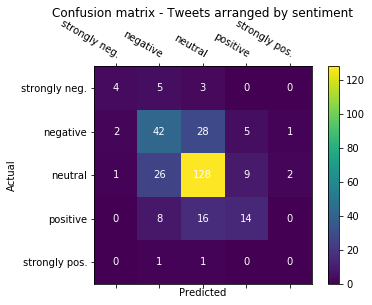

In [72]:
labels = ['strongly neg.', 'negative', 'neutral', 'positive', 'strongly pos.']
fig = plt.figure()
ax = fig.add_subplot(111)
cm = ax.matshow(mat)
# plot the title, use y to leave some space before the labels
plt.title("Confusion matrix - Tweets arranged by sentiment", y=1.2)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

plt.xlabel("Predicted")
plt.ylabel("Actual")
# Loop over data dimensions and create text annotations.
for i in range(len(mat)):
    for j in range(len(mat)):
        text = ax.text(j, i, mat[i, j],
                       ha="center", va="center", color="w")
    # Create colorbar
fig.colorbar(cm);

The numbers in the diagonal are all the times when the predicted sentiment for a tweet was the same as the actual sentiment. 
Now we can define accuracy as the sum of all the values in the diagonal divided by the total of the values.  
The best accuracy would be 1.0 when all values are on the diagonal (no errors!), whereas the worst is 0.0 (nothing correct)! 

In [73]:
correctPredictions = sum(mat[i][i] for i in range(len(mat)))
correctPredictions

188

In [74]:
print("Accuracy: {:.2}".format(correctPredictions / len(y_test)))

Accuracy: 0.64


Which is the same value as above.  
  
  
### A simple baseline

Now, how good is this accuracy?  
Let's compare this to a simple baseline model that always predicts neutral (the most common tweets in the test dataset).

In [75]:
neutralTweets = sum(1 for sentiment in y_test if sentiment == 0)  # neutral tweets in Test dataset
neutralTweets

166

In [76]:
len(y_test) - neutralTweets

130

This tells us that in our test dataset we have 178 observation with neutral sentiment and 118 with positive or negative tweets.   
So the accuracy of a baseline model that always predict non-negative tweets would be:

In [77]:
print("Accuracy baseline: {:.2}".format(neutralTweets / len(y_test)))

Accuracy baseline: 0.56


So our Naive Bayesian model does better than the simple baseline.

# Predict the sentiment of a new tweet

The classifier can be applied to new tweets, of course, to predict their sentiment:

In [78]:
# for simplicity, it re-uses the vectorizer and the classifier without passing them
# as arguments. Industrialising it would mean to create a pipeline with
# vectoriser > classifier > label string
def predictSentiment(t):
    bow = cv.transform([t])
    prediction = classifier.predict(bow)
    if prediction == 0:
        return "Neutral"
    elif prediction > 0:
        return "Positive"
    else:
        return "Negative"

In [79]:
predictSentiment("I don't know what to think about apple!")

'Neutral'

Ok. We try with two new tweets and see what we get, one positive and one negative

In [80]:
predictSentiment("I love apple, its products are always the best, really!")

'Positive'

In [81]:
predictSentiment("Apple lost its mojo, I will never buy again an iphone better an Android")

'Negative'

# Binary Classification

Now, this is a more generic case, where we have 5 classes as target.  
The case you see more often is the binary one, with only two classes, which has some special characteristics and metrics.
Let's convert our target into a binary one:  a tweet can be either negative or not negative (i.e., positive or neutral).

First of all, we need to transform our original dataset to reduce the sentiment classes to only two classes.

In [82]:
X.loc[X.Avg < 0] = -1 # negative sentiment
X.loc[X.Avg >= 0] = 1 # NON-negative sentiment

We need to re-apply the classifier

In [83]:
X_train, X_test, y_train, y_test = train_test_split(df, X.Avg, test_size=0.25)

In [84]:
#from sklearn import naive_bayes

In [85]:
# classifier = naive_bayes.BernoulliNB()  # 0.78

In [86]:
classifier = MultinomialNB()  # 0.77

In [87]:
# classifier = naive_bayes.GaussianNB()  # wow, 0.53

In [88]:
# classifier = naive_bayes.ComplementNB()  # wow, 0.64

In [89]:
classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [90]:
predictionsTwo = classifier.predict(X_test)

In [91]:
predictionsTwo[0:100]

array([ 1,  1,  1, -1, -1,  1,  1,  1, -1,  1, -1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1, -1,  1,  1, -1,  1,
       -1,  1,  1,  1, -1,  1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1])

As you can see, there is no more classes 2, 0 or -2 now

In [92]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy: {:.2}".format(metrics.accuracy_score(y_test, predictionsTwo)))

Accuracy: 0.79


Of course is better, we have less classes to predict, less errors to make.  
Let's see how the confusion matrix looks like:

In [93]:
matBinary = metrics.confusion_matrix(y_test, predictionsTwo)
matBinary

array([[ 45,  40],
       [ 22, 189]])

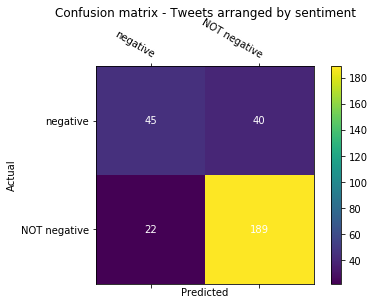

In [94]:
labels = ['negative', 'NOT negative']
fig = plt.figure()
ax = fig.add_subplot(111)
cm = ax.matshow(matBinary)
# plot the title, use y to leave some space before the labels
plt.title("Confusion matrix - Tweets arranged by sentiment", y=1.2)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

plt.xlabel("Predicted")
plt.ylabel("Actual")
# Loop over data dimensions and create text annotations.
for i in range(len(matBinary)):
    for j in range(len(matBinary)):
        text = ax.text(j, i, matBinary[i, j],
                       ha="center", va="center", color="w")
    # Create colorbar
fig.colorbar(cm);

In a two-class problem, we are often looking to discriminate between observations with a specific outcome, from normal observations. Such as a disease state or no disease state or spam versus no-spam.
One being the positive event and the other the no-event, the negative event.
  
In our case, let's say the negative event is the negative tweet and the positive event is the NON-negative tweet.  

These are basic terms used in binary classification:

“true positive” for correctly predicted event values (in our scenario the non-negative tweets: positive or neutral).  
“true negative” for correctly predicted no-event values (in our scenario the negative tweets).  
“false positive” for incorrectly predicted event values. In Hypothesis Testing it is also known as Type 1 error or the incorrect rejection of Null Hypothesis.  
“false negative” for incorrectly predicted no-event values. It is also known as Type 2 error, which leads to the failure in rejection of Null Hypothesis.   

In [95]:
tn, fp, fn, tp = matBinary.ravel()

In [96]:
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  45
False Positives:  40
False Negatives:  22
True Positives:  189


Accuracy can be re-formulated as the ratio between the true events (positive and negative) and the total events:

In [97]:
Accuracy = (tn+tp)/(tp+tn+fp+fn) 
print("Accuracy: {:.2f}".format(Accuracy))

Accuracy: 0.79


Accuracy is not a reliable metric for the real performance of a classifier, because it will yield misleading results if the data set is unbalanced (that is, when the numbers of observations in different classes vary greatly).

Then you may consider additional metrics like Precision, Recall, F score (combined metric):

### Sensitivity or Recall 
It is the ‘Completeness’, ability of the model to identify all relevant instances, True Positive Rate, aka Sensitivity.  
Imagine a scenario where your focus is to have the least False Negatives, ofr example if you are trying to predict if an email is a spam or not, you don’t want authentic messages to be wrongly classified as spam. Then Sensitivity can come to rescue:

In [98]:
Sensitivity = tp/(tp+fn) 
print("Sensitivity {:0.2f}".format(Sensitivity))

Sensitivity 0.90


Sensitivity is a real number between 0 and 1. A sensitivity of 1 means that ALL the Negative cases have been correctly classified. 

### Specificity

In [99]:
#Specificity 
Specificity = tn/(tn+fp)
print("Specificity {:0.2f}".format(Specificity))

Specificity 0.53


# ROC (Receiver Operating Characteristic) curve

Until now, we have seen classification problems where we predict the target class directly.

Sometimes it can be more insightful or flexible to predict the probabilities for each class instead. From one side you will get an idea of how confident is the classifier for each class, on the other side you can use them to calibrate the threshold for how to interpret the predicted probabilities.

For example, in a binary classifier the default is to use a threshold of 0.5, meaning that a probability less than 0.5 is a negative outcome and a probability equal or over 0.5 is a positive outcome.
But this threshold can be adjusted to tune the behavior of the model for the specific problem, e.g. to reduce more of one or another type of error, as we have seen above.
Think about a classifier that predict if an event is a nuclear attack or not. Clearly you want to have as less as possible false alarms!

A diagnostic tools helpin in choosing the right threshold is the ROC curve.

This is the plot of the ‘True Positive Rate’ (Sensitivity) on the y-axis against the ‘False Positive Rate’ (1 minus Specificity) on the x-axis, at different classification thresholds between 0 and 1.

It captures all the thresholds simultaneously and the area under the ROC curve measures how well a parameter can distinguish between two groups. 
Threshold =0 is at the axis origin (0,0) while the threshold = 1 is at the top right end of the curve.
- high threshold: means high specificity and low sensitivity
- Low threshold: means low specificity and high sensitivity  

Put another way, it plots the false alarm rate versus the hit rate.  

Let's see an example using our binary classification above.  
First, you need probabilities to create the ROC curve.

In [100]:
probs = classifier.predict_proba(X_test) # get the probabilities

In [101]:
preds = probs[:,1]  ## keep probabilities for the positive outcome only
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)  # calculate roc 
roc_auc = metrics.auc(fpr, tpr)  # calculate AUC


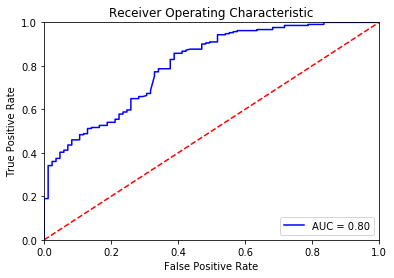

In [102]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')  # plot random guessing

plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


The ROC curve is a useful tool for a few reasons:

- The curves of different models can be compared directly in general or for different thresholds.
- The area under the curve (AUC) can be used as a summary of the model skill.

A random guessing classifier (the red line above) has an Area Under the Curve (often referred as AUC) of 0.5, while AUC for a perfect classifier is equal to 1.
In general AUC of above 0.8 is considered "good".

Looking at the ROC curve you can choose a threshold that gives a desirable balance between the:
- cost of failing to detect positive
- cost of raising false alarms

### Precision and F1 score metrics

Called also Positive Predictive Power, the Precision measures somehow how "exact" it is, i.e.  the ability of the model to return only relevant instances. If your use case/problem statement involves minimising the False Positives then Precision is something you need:

In [103]:
# Precision 
Precision = tp/(tp+fp) 
print("Precision or Positive Predictive Power: {:0.2f}".format(Precision))

Precision or Positive Predictive Power: 0.83


Similarly, you can calculate the Negative Predictive Power:

In [104]:
# Negative Predictive Value
print("Negative predictive Power: {:0.2f}".format(tn / (tn+fn)))

Negative predictive Power: 0.67


The F1 score is the harmonic mean of the Precision & Sensitivity, and is used to indicate a balance between them. It ranges from 0 to 1; F1 Score reaches its best value at 1 (perfect precision & sensitivity) and worst at 0.

In [105]:
# F1 Score
f1 = (2 * Precision * Sensitivity) / (Precision + Sensitivity)
print("F1 Score {:0.2f}".format(f1))

F1 Score 0.86


### What do we use the ROC for?

In [106]:
classifierTuned = MultinomialNB(class_prior=[.4, 0.6]) # try to max specificity

In [107]:
classifierTuned.fit(X_train, y_train)
predictionsTuned = classifierTuned.predict(X_test)

In [108]:
matTuned = metrics.confusion_matrix(y_test, predictionsTuned)
matTuned

array([[ 53,  32],
       [ 36, 175]])

In [109]:
tn, fp, fn, tp = matTuned.ravel()

In [110]:
Accuracy = (tn+tp)/(tp+tn+fp+fn) 
print("Accuracy: {:.2f}".format(Accuracy)) # it was 0.79

Accuracy: 0.77


In [111]:
Sensitivity = tp/(tp+fn) 
print("Sensitivity {:0.2f}".format(Sensitivity)) #it was 0.9

Sensitivity 0.83


In [112]:
Specificity = tn/(tn+fp)
print("Specificity {:0.2f}".format(Specificity)) # it was 0.53

Specificity 0.62


We have greatly improved the specificity at the cost of a smaller decrease of the sensitivity and accuracy.

## And the metrics for multiple classes?

In a 2x2, once you have picked one category as positive, the other is automatically negative. With 5 categories, you basically have 5 different sensitivities, depending on which of the five categories you pick as "positive". You could still calculate their metrics by collapsing to a 2x2, i.e. Class1 versus not-Class1, then Class2 versus not-Class2, and so on, as we did above.

You can actually have sensitivity and specificity regardless of the number of classes. The only difference here is that you will get one specificity and sensitivity and accuracy and F1-score for each of the classes. If you want to report, you can report the average of these values.

We have to do these calculations for each class separately, then we average these measures, to get the average of precision and the average of recall. I leave this as exercise for you.